In [1]:
import os
import pandas as pd
pd.set_option('display.max_colwidth', 400)
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )
import glob
os.sys.path.insert(0, '../evaluation')
import re
c = re.compile(r'^45335__(\d{1,2})')
%matplotlib inline

In [2]:
models = [os.path.basename(p) for p in glob.glob(f'../data/models/test/*')]

dfs = [pd.read_csv(f'../data/models/test/{model}/system_evaluation.csv', 
                   index_col=['subset', 'references', 'metric']) for model in models]

df = pd.concat(dfs, keys=models)

In [3]:
def tabela(set_):
    ddf = df.loc[(slice(None), set_, '[0, 1, 2]'), :].unstack()\
    .reset_index(level=[1, 2], drop=True)\
    [[('value', 'bleu'), ('value', 'meteor'), ('value', 'ter')]]\
    .sort_values(('value', 'bleu'), ascending=False)

    model_names = ddf.index.tolist()
    mapped_model_names = []
    for model_name in model_names:
        n = c.findall(model_name)
        if n:
            mapped_model_names.append(f'TBMS_{n[0]}')
        else:
            mapped_model_names.append(model_name)

    ddf.index = mapped_model_names
    print(ddf.to_latex())
    
tabela('old-cat')

\begin{tabular}{lrrr}
\toprule
{} & \multicolumn{3}{l}{value} \\
metric &   bleu &    meteor &       ter \\
\midrule
adaptcentre            &  60.59 &  0.445389 &  0.378763 \\
TBMS\_9                 &  59.64 &  0.438606 &  0.369851 \\
TBMS\_8                 &  59.41 &  0.438666 &  0.370576 \\
TBMS\_10                &  59.33 &  0.437968 &  0.371258 \\
TBMS\_6                 &  59.19 &  0.438503 &  0.371386 \\
TBMS\_7                 &  58.96 &  0.437352 &  0.374328 \\
TBMS\_5                 &  58.78 &  0.438228 &  0.374968 \\
TBMS\_4                 &  58.45 &  0.436717 &  0.374115 \\
deepnlg-e2ernn         &  58.36 &  0.415778 &  0.397737 \\
TBMS\_3                 &  57.33 &  0.431618 &  0.385884 \\
deepnlg-transformer    &  56.48 &  0.415341 &  0.390318 \\
deepnlg-rnn            &  56.22 &  0.421304 &  0.391384 \\
seq2seq\_wc\_word        &  55.82 &  0.405280 &  0.399997 \\
TBMS\_2                 &  55.57 &  0.424378 &  0.403664 \\
gcn                    &  55.35 &  0.390372 & 

In [4]:
tabela('new-cat')

\begin{tabular}{lrrr}
\toprule
{} & \multicolumn{3}{l}{value} \\
metric &   bleu &    meteor &       ter \\
\midrule
BIU\_nmt                &  37.55 &  0.362192 &  0.552363 \\
upf-forge              &  35.70 &  0.373621 &  0.559565 \\
BIU\_Chimera\_v1         &  34.41 &  0.338155 &  0.561982 \\
melbourne              &  33.27 &  0.332213 &  0.559212 \\
BIU\_Random\_0           &  33.02 &  0.333524 &  0.598998 \\
BIU\_Random\_2           &  32.87 &  0.333544 &  0.595221 \\
BIU\_Random\_1           &  32.48 &  0.334254 &  0.598041 \\
TBMS\_8                 &  31.57 &  0.357357 &  0.611387 \\
TBMS\_10                &  31.43 &  0.356947 &  0.611487 \\
TBMS\_9                 &  31.43 &  0.357575 &  0.611639 \\
TBMS\_7                 &  31.01 &  0.356515 &  0.618488 \\
TBMS\_6                 &  30.75 &  0.355618 &  0.620502 \\
TBMS\_4                 &  30.66 &  0.355168 &  0.619243 \\
TBMS\_5                 &  30.49 &  0.355290 &  0.621560 \\
tilburg-smt            &  29.88 &  0.3333

In [6]:
elapsed_time_dfs = []
for model in models:
    try:
        with open(f'../data/models/test/{model}/elapsed_time.txt', 'r') as f:
            elapsed_time_dfs.append(pd.DataFrame(data=[float(f.readline()[:-1])], index=[model], columns=['elapsed_time']))
    except FileNotFoundError:
        pass
elapsed_time_df = pd.concat(elapsed_time_dfs)

elapsed_time_df = pd.merge(elapsed_time_df, df.loc[(slice(None), 'old-cat', '[0, 1, 2]'), :].unstack().reset_index(level=[1, 2], drop=True), left_index=True, right_index=True)
elapsed_time_df['n'] = [int(c.findall(nome)[0]) for nome in elapsed_time_df.index.tolist()]
elapsed_time_df.sort_values('n', inplace=True)

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [7]:
elapsed_time_df.head()

,elapsed_time,"(value, avg_n_stop_words)","(value, avg_n_tokens)","(value, bleu)","(value, bleu_1)","(value, bleu_2)","(value, bleu_3)","(value, bleu_4)","(value, macro_avg_n_stop_words)","(value, meteor)","(value, ter)",n
45335__1_1_1_1_lp_tems_0_0_lp_txs_0_0,3.104362,0.279765,23.614830,50.28,80.0,57.6,42.6,32.5,0.282845,0.407020,0.455002,1
45335__2_2_2_2_lp_tems_0_0_lp_txs_0_0,7.539842,0.304078,23.105046,55.57,84.6,63.9,48.9,38.0,0.301977,0.424378,0.403664,2
45335__3_3_3_3_lp_tems_0_0_lp_txs_0_0,12.918893,0.310933,23.049434,57.33,86.1,66.0,50.9,40.0,0.308293,0.431618,0.385884,3
45335__4_4_4_4_lp_tems_0_0_lp_txs_0_0,26.926478,0.316307,22.944387,58.45,87.2,67.3,52.3,41.3,0.311059,0.436717,0.374115,4
45335__5_5_5_5_lp_tems_0_0_lp_txs_0_0,42.870713,0.316426,23.065911,58.78,87.1,67.4,52.5,41.6,0.311738,0.438228,0.374968,5


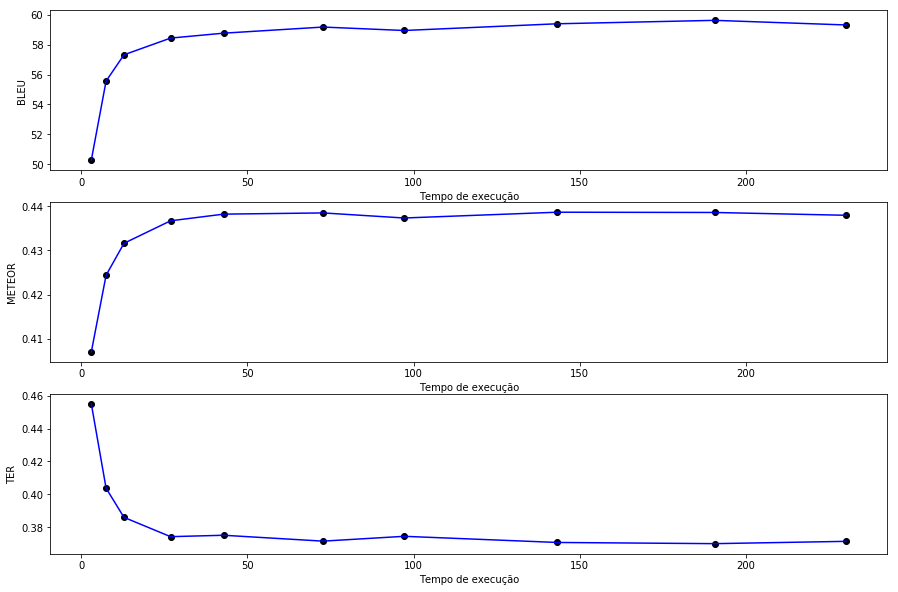

In [10]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(311)
plt.plot(elapsed_time_df.elapsed_time, elapsed_time_df[('value', 'bleu')], 'b')
plt.scatter(elapsed_time_df.elapsed_time, elapsed_time_df[('value', 'bleu')], c='black')
plt.ylabel('BLEU')
plt.xlabel('Tempo de execução')

plt.subplot(312)
plt.plot(elapsed_time_df.elapsed_time, elapsed_time_df[('value', 'meteor')], 'b')
plt.scatter(elapsed_time_df.elapsed_time, elapsed_time_df[('value', 'meteor')], c='black')
plt.ylabel('METEOR')
plt.xlabel('Tempo de execução')

plt.subplot(313)
plt.plot(elapsed_time_df.elapsed_time, elapsed_time_df[('value', 'ter')], 'b')
plt.scatter(elapsed_time_df.elapsed_time, elapsed_time_df[('value', 'ter')], c='black')
plt.ylabel('TER')
plt.xlabel('Tempo de execução')


plt.savefig('metricas_vs_tempo.png', dpi=500)

In [5]:
old_cat = !cat ../evaluation/subsets/test/old-cat.txt
old_cat = [int(i) for i in old_cat]

sizes = {}
for i in range(1, 8):
    sizes[i] = !cat ../evaluation/subsets/test/{i}size.txt
    print(f'{i} -> {len(sizes[i])}')
    sizes[i] = [int(j) for j in sizes[i] if int(j) in old_cat]

1 -> 454
2 -> 349
3 -> 386
4 -> 363
5 -> 265
6 -> 24
7 -> 21


In [38]:
from random import Random

show_in_paper = Random(281958).sample(old_cat, 1) # seed é diahoraminuto do momento em que digitei isso :)
r = Random(160729)

qualitative_analysis = [] 
for js in sizes.values():
    chosen = r.sample(js, 10)
    qualitative_analysis.extend(chosen)

In [7]:
# my texts
with open('../data/models/test/43434_5512_00/43434_5512_00_all-cat.lex', 'r', encoding='utf-8') as f:
    my_texts = [l[:-1] for l in f.readlines()]
    
# my texts + LP
#with open('../data/models/test/43434_5512_505/43434_5512_505_all-cat.lex', 'r', encoding='utf-8') as f:
#    my_texts_lp = [l[:-1] for l in f.readlines()]
    
# adaptcentre
with open('../data/models/test/adaptcentre/adaptcentre_all-cat.lex', 'r', encoding='utf-8') as f:
    adaptcentre = [l[:-1] for l in f.readlines()]
    
# upf-forge
with open('../data/models/test/upf-forge/upf-forge_all-cat.lex', 'r', encoding='utf-8') as f:
    upf_forge = [l[:-1] for l in f.readlines()]
    
# deepnlg-e2ernn
with open('../data/models/test/deepnlg-e2ernn/deepnlg-e2ernn_all-cat.lex', 'r', encoding='utf-8') as f:
    deepnlg_e2ernn = [l[:-1] for l in f.readlines()]
    
# gcn
with open('../data/models/test/gcn/gcn_old-cat.lex', 'r', encoding='utf-8') as f:
    gcn = [l[:-1] for l in f.readlines()]

In [8]:
def to_string(e):
    
    triples = '\n'.join(f'<{t.subject} , {t.predicate} , {t.object}>' for t in e.triples)
    lexes = '\n'.join(l['text'] for l in e.lexes)
    
    return f'category={e.category}\n\ntriples:\n{triples}\n\nreferences:\n{lexes}'

In [9]:
%run ../template_model/reading_thiagos_templates.py

test = load_shared_task_test()

In [32]:
entries_show_in_paper = [test[i] for i in show_in_paper + show_in_paper_2]
entries_to_qualitative_analysis = [test[i] for i in qualitative_analysis]

In [75]:
show_in_paper_2 = Random(300846).sample(old_cat, 1) # seed é diahoraminuto do momento em que digitei isso :)

texts_show_in_paper = [{'entry': to_string(test[i]),
                        'me': my_texts[i],
                        #'me_lp': my_texts_lp[i],
                        'adaptcentre': adaptcentre[i],
                        'upf_forge': upf_forge[i],
                        'gcn': gcn[i],
                        'deepnlg_e2ernn': deepnlg_e2ernn[i]} for i in show_in_paper + show_in_paper_2]
sip_df = pd.DataFrame(texts_show_in_paper)

texts_to_qualitative_analysis = [{'entry': to_string(test[i]),
                                  'me': my_texts[i],
                                  'adaptcentre': adaptcentre[i],
                                  'upf_forge': upf_forge[i]} for i in qualitative_analysis]
qa_df = pd.DataFrame(texts_to_qualitative_analysis)

In [76]:
pretty_print(sip_df[['entry', 'me', 'adaptcentre', 'upf_forge', 'deepnlg_e2ernn', 'gcn']])

,entry,me,adaptcentre,upf_forge,deepnlg_e2ernn,gcn
0,"category=Airporttriples:<Belgium , leaderName , Charles_Michel><Antwerp_International_Airport , cityServed , Antwerp><Belgium , language , German_language><Antwerp , country , Belgium>references:Antwerp International Airport serves the city of Antwerp which is a popular tourist destination in Belgium. One of the languages spoken in Belgium is German, and the leader is Charles Michel.Charles Michel is the leader of Belgium where the German language is spoken. Antwerp is located in the country and served by Antwerp International airport.Antwerp International airport services (Charles Michel) led Antwerp, Belgium. German is spoken here..",antwerp international airport serves the city of antwerp in belgium where charles michel is a leader . the country ' s language is german .,"antwerp international airport serves the city of antwerp , a popular tourist destination in belgium , where german is spoken and the leader is charles michel .","the antwerp international airport serves antwerp , which is in belgium . charles michel is the leader of belgium , in which the german language is spoken .",antwerp is a popular tourist destination in belgium where the leader is charles michel and german is the language spoken .,"antwerp international airport serves the city of antwerp , belgium , where charles michel is a leader and german is the language spoken ."
1,"category=Universitytriples:<India , largestCity , Mumbai><AWH_Engineering_College , country , India><Kerala , leaderName , Kochi><AWH_Engineering_College , state , Kerala><India , river , Ganges>references:AWH Engineering College is located in Kerala India. Kochi is the leader of Kerala. Ganges is the main river in India and Mumbai is the largest city.","awh engineering college is in kerala , india where the leader is kochi . the ganges is a river in the country and mumbai is its largest city .","awh engineering college is in kerala , india . the leader of kerala is kochi . the ganges is a river in india and mumbai is its largest city .","awh engineering college is in india and kerala . the largest city in , a river ganges , india is mumbai . kochi is the leader of kerala .","awh engineering college is in kerala , india . the leader of kerala is kochi . the ganges is a river in india and mumbai is its largest city . the leader of kerala is kochi .","the awh engineering college is located in the state of kerala , india . kochi is the largest city in india and india ' s largest city is mumbai ."


In [12]:
pretty_print(qa_df[['entry', 'me', 'adaptcentre', 'upf_forge']])

,entry,me,adaptcentre,upf_forge
0,"category=Buildingtriples:<Pacific_Grove,_California , isPartOf , California>references:Pacific Grove, California is part of California.Pacific Grove is part of California.","pacific grove , california is part of california .",pacific grove is part of california .,"pacific grove , california is part of california ."
1,"category=Astronauttriples:<California , gemstone , Benitoite>references:The gemstone of California is Benitoite.California has a gemstone called Benitoite.Benitoite is a gemstone from California.Benitoite is a gemstone found in California.",california gemstone benitoite .,california ' s gemstone is benitoite .,california is well known for the benitoite gemstone .
2,"category=Astronauttriples:<Buzz_Aldrin , almaMater , ""Massachusetts Institute of Technology, Sc.D. 1963"">references:Buzz Aldrin graduated from Massachusetts Institute of Technology with a Sc.D in 1963.Buzz Aldrin graduated in 1963 from MIT with a Sc.D.Buzz Aldrin graduated from MIT with a Sc. D in 1963.Buzz Aldrin graduated from Massachusetts Institute of Technology, Sc.D. 1963.Buzz Aldrin graduated from Massachusetts Institute of Technology in 1963 with a doctorate in Science.",buzz aldrin graduated from mit with a sc . d . in 1963 .,"buzz aldrin graduated from massachusetts institute of technology , sc . d . 1963 .",buzz aldrin graduated from massachusetts institute of technology in 1963 with a sc . d . .
3,"category=Foodtriples:<Batagor , mainIngredients , ""fried fish dumpling with tofu and vegetables in peanut sauce"">references:A batagor consists of a fried fish dumpling with tofu and vegetables in peanut sauce.Batagor has these main ingredients - fried fish dumplings, tofu and vegetables in peanut sauce.Batagor's main ingredients are fried fish dumpling with tofu and vegetables in peanut sauce.",batagor is a fried fish dumpling with tofu and vegetables in peanut sauce .,"the main ingredients of batagor are fried fish dumplings , tofu and vegetables in peanut sauce .",the main ingredient in batagor are fried fish dumpling with tofu and vegetables inpeanut sauce .
4,"category=Foodtriples:<India , currency , Indian_rupee>references:The currency of India is the Indian rupee.Indian rupee is the currency in India.the Indian rupee is the currency in India.",the indian rupee is the currency in india .,the currency of india is the indian rupee .,the currency of india is the indian rupee .
5,"category=Universitytriples:<School of Business and Social Sciences at the Aarhus University , numberOfStudents , 16000>references:The School of Business and Social Sciences at Aarhus University has 16000 students.Aarhus University School of Business and Social Sciences' number of students are 16000.There are 16000 students at the School of Business and Social Sciences at the University of Aarhus.There are 16000 students in the Aarhus University School of Business and Social Sciences.Aarhus University School of Business and Social Sciences has 16000 students.The number of students in School of Business and Social Sciences at the Aarhus University is 16000.The number of students at the School of Business and Social Sciences at the Aarhus University is 16000.The School of Business and Social Sciences at the Aarhus University has 16000 students.",the school of business and social sciences at the aarhus university has 16000 students .,the school of business and social sciences at the aarhus university has 16000 students .,"the aarhus university , school of business and social sciences has 16000 students ."
6,"category=Foodtriples:<New_York , language , Spanish_language>references:Spanish language is one of the languages spoken in New York.one of the languages of New York is Spanish.",spanish is a language in new york .,spanish is one language spoken in new york .,the spanish language is spoken in new york .
7,"category=SportsTeamtriples:<Michele_Marcolini , club , Vicenza_Calcio>references:Michele Marcolini played for Vicenza Calcio.M

In [13]:
qa_df.to_csv('qualitative_analysis.csv', index=False)

# BLEU

https://github.com/moses-smt/mosesdecoder/blob/master/scripts/generic/multi-bleu.perl

Download multi-bleu.perl and put it in **../evaluation/tools/**

# METEOR

http://www.cs.cmu.edu/~alavie/METEOR/

Download meteor-1.5 and unpack into **../evaluation/tools/**

The jar path must be **../evaluation/tools/meteor-1.5/meteor-1.5.jar**

# TER

http://www.cs.umd.edu/~snover/tercom/

Download tercom-0.7.25 and unpack into **../evaluation/tools/**

The jar path must be **../evaluation/tools/tercom-0.7.25/tercom-0.7.25.jar**

<img src="../img/competition_results.jpg" />

## Melbourne

<a href="../data/models/melbourne/WebNLG Challenge - Bayu Distiawan T.pdf">report</a>

In [5]:
df.loc[('melbourne', slice(None), slice(None))].unstack()

value                      \
metric                             avg_n_stop_words avg_n_tokens   bleu   
          subset        references                                        
melbourne 1size         [0, 1, 2]          0.252278     9.927313  63.81   
                        [0, 1]             0.253384     9.927313  57.81   
          2size         [0, 1, 2]          0.306310    16.598854  51.25   
                        [0, 1]             0.301743    16.598854  46.92   
          3size         [0, 1, 2]          0.319356    22.341969  43.42   
                        [0, 1]             0.317834    22.341969  39.02   
          4size         [0, 1, 2]          0.329409    28.953168  42.14   
                        [0, 1]             0.326356    28.953168  38.09   
          5size         [0, 1, 2]          0.353569    34.796226  36.72   
                        [0, 1]             0.352673    34.796226  33.19   
          6size         [0, 1, 2]          0.345861    43.958333  52.16   
                        [0, 1]             0.349763    43.958333  47.68   
          7size         [0, 1, 2]          0.362121    44.380952  48.65   
                        [0, 1]             0.364807    44.380952  45.28   
          all-cat       [0, 1, 2]          0.308209    21.827068  45.13   
                        [0, 1]             0.320407    21.827068  40.86   
          new-cat       [0, 1, 2]          0.306252    20.819304  33.27   
                        [0, 1]             0.324205    20.819304  29.75   
          old-cat       [0, 1, 2]          0.310004    22.751802  54.52   
                        [0, 1]             0.317219    22.751802  49.73   
          with-template [0, 1, 2]          0.304047    17.710145  59.15   
                        [0, 1]             0.304047    17.710145  53.82   

                                                                \
metric                             bleu_1 bleu_2 bleu_3 bleu_4   
          subset        references                               
melbourne 1size         [0, 1, 2]    87.5   72.5   60.5   49.9   
                        [0, 1]       85.4   67.9   54.5   43.0   
          2size         [0, 1, 2]    82.2   59.7   44.8   34.0   
                        [0, 1]       79.4   55.5   40.5   30.0   
          3size         [0, 1, 2]    80.3   54.7   37.4   25.6   
                        [0, 1]       77.2   50.2   33.2   22.1   
          4size         [0, 1, 2]    78.6   52.7   35.6   24.6   
                        [0, 1]       75.9   48.9   32.3   21.8   
          5size         [0, 1, 2]    75.3   47.9   29.7   18.4   
                        [0, 1]       73.2   44.8   27.1   16.2   
          6size         [0, 1, 2]    81.8   60.3   45.7   35.3   
                        [0, 1]       80.0   55.9   41.0   30.5   
          7size         [0, 1, 2]    81.4   60.3   44.7   33.6   
                        [0, 1]       79.7   58.0   41.9   30.7   
          all-cat       [0, 1, 2]    79.9   55.4   38.8   27.4   
                        [0, 1]       77.3   51.5   35.0   24.0   
          new-cat       [0, 1, 2]    72.2   44.0   27.1   16.2   
                        [0, 1]       69.6   40.7   24.2   14.1   
          old-cat       [0, 1, 2]    86.3   65.0   48.5   36.6   
                        [0, 1]       83.8   60.6   44.0   32.2   
          with-template [0, 1, 2]    88.9   69.4   54.1   42.4   
                        [0, 1]       86.7   65.0   49.0   37.3   

                                                                               
metric                             macro_avg_n_stop_words    meteor       ter  
          subset        references                                             
melbourne 1size         [0, 1, 2]                0.253384  0.471922  0.274120  
                        [0, 1]                   0.252278  0.454606  0.307993  
          2size         [0, 1, 2]                0.301743  0.421393  0.389833  
                        [0, 1]         

In [6]:
!head -100 ../data/models/melbourne/melbourne.txt | tail -10

## Tilb-SMT

<a href="../data/models/tilburg-smt/report.pdf">report</a>

In [7]:
df.loc[('tilburg-smt', slice(None), slice(None))].unstack()

value                      \
metric                               avg_n_stop_words avg_n_tokens   bleu   
            subset        references                                        
tilburg-smt 1size         [0, 1, 2]          0.188913     8.033040  52.16   
                          [0, 1]             0.193858     8.033040  45.28   
            2size         [0, 1, 2]          0.209839    15.985673  48.16   
                          [0, 1]             0.207026    15.985673  44.00   
            3size         [0, 1, 2]          0.217507    23.606218  43.42   
                          [0, 1]             0.217845    23.606218  39.46   
            4size         [0, 1, 2]          0.218908    31.418733  42.44   
                          [0, 1]             0.217098    31.418733  38.76   
            5size         [0, 1, 2]          0.234479    38.181132  38.68   
                          [0, 1]             0.234631    38.181132  36.03   
            6size         [0, 1, 2]          0.323156    49.208333  49.71   
                          [0, 1]             0.329382    49.208333  46.08   
            7size         [0, 1, 2]          0.313886    54.809524  44.44   
                          [0, 1]             0.322328    54.809524  40.98   
            all-cat       [0, 1, 2]          0.214235    22.660043  44.28   
                          [0, 1]             0.224137    22.660043  40.31   
            new-cat       [0, 1, 2]          0.125485    20.683502  29.88   
                          [0, 1]             0.122253    20.683502  27.03   
            old-cat       [0, 1, 2]          0.295673    24.473738  54.29   
                          [0, 1]             0.303148    24.473738  49.95   
            with-template [0, 1, 2]          0.294589    17.750988  56.04   
                          [0, 1]             0.294589    17.750988  51.05   

                                                                  \
metric                               bleu_1 bleu_2 bleu_3 bleu_4   
            subset        references                               
tilburg-smt 1size         [0, 1, 2]    88.4   70.9   56.0   45.7   
                          [0, 1]       86.6   66.9   50.8   39.9   
            2size         [0, 1, 2]    76.7   57.7   43.6   33.6   
                          [0, 1]       74.5   54.1   39.5   29.8   
            3size         [0, 1, 2]    73.2   51.9   36.8   26.2   
                          [0, 1]       70.1   47.8   32.8   22.7   
            4size         [0, 1, 2]    72.2   50.5   35.3   25.2   
                          [0, 1]       69.8   46.9   31.6   21.8   
            5size         [0, 1, 2]    71.2   47.8   31.4   20.9   
                          [0, 1]       69.3   44.9   28.8   18.8   
            6size         [0, 1, 2]    78.6   59.2   42.8   30.7   
                          [0, 1]       76.6   55.3   39.2   27.1   
            7size         [0, 1, 2]    75.8   53.5   37.0   26.0   
                          [0, 1]       72.7   49.9   33.5   23.2   
            all-cat       [0, 1, 2]    74.4   53.0   37.5   26.8   
                          [0, 1]       72.1   49.5   33.8   23.5   
            new-cat       [0, 1, 2]    65.0   40.6   24.5   14.9   
                          [0, 1]       62.7   38.0   22.1   13.0   
            old-cat       [0, 1, 2]    81.8   62.6   47.4   35.8   
                          [0, 1]       79.4   58.2   42.7   31.5   
            with-template [0, 1, 2]    85.2   66.0   50.8   39.4   
                          [0, 1]       83.0   61.9   46.2   34.9   

                                                                       \
metric                               macro_avg_n_stop_words    meteor   
            subset        references                                    
tilburg-smt 1size         [0, 1, 2]                0.193858  0.412354   
                          [0, 1]                   0.188913  0.399776   
            2size         [0, 1, 2]                0.207

In [8]:
!head -100 ../data/models/tilburg-smt/tilburg-smt.txt | tail -10

novel castle is english language 
. eric flint was born in burbank , california . 
macmillan publishers is the parent company of farrar , straus and giroux 
john cowper powys notablework a glastonbury romance 
soho press , united states . 
, published by faber and faber 
asian americans are an ethnic group . 
english is the language of the united states . 
weymouth sands was preceded by a glastonbury romance 
the manager of a.c. chievo verona is rolando maran 


## PKUWriter

<a href="../data/models/pkuwriter/PKUWriter_system.pdf">report</a>

In [9]:
df.loc[('pkuwriter', slice(None), slice(None))].unstack()

value                      \
metric                             avg_n_stop_words avg_n_tokens   bleu   
          subset        references                                        
pkuwriter 1size         [0, 1, 2]          0.288924    10.788546  53.15   
                        [0, 1]             0.283585    10.788546  49.09   
          2size         [0, 1, 2]          0.304937    15.813754  45.34   
                        [0, 1]             0.297699    15.813754  41.06   
          3size         [0, 1, 2]          0.325455    21.528497  34.89   
                        [0, 1]             0.327196    21.528497  30.73   
          4size         [0, 1, 2]          0.339113    25.914601  36.80   
                        [0, 1]             0.331136    25.914601  32.50   
          5size         [0, 1, 2]          0.370858    30.664151  34.17   
                        [0, 1]             0.358110    30.664151  30.43   
          6size         [0, 1, 2]          0.371622    42.041667  52.89   
                        [0, 1]             0.373637    42.041667  50.67   
          7size         [0, 1, 2]          0.383537    47.333333  52.63   
                        [0, 1]             0.385312    47.333333  49.16   
          all-cat       [0, 1, 2]          0.323077    20.549409  39.85   
                        [0, 1]             0.327627    20.549409  35.72   
          new-cat       [0, 1, 2]          0.319450    18.693603  25.36   
                        [0, 1]             0.318204    18.693603  21.94   
          old-cat       [0, 1, 2]          0.326405    22.252317  51.18   
                        [0, 1]             0.334891    22.252317  46.79   
          with-template [0, 1, 2]          0.321128    18.027668  53.46   
                        [0, 1]             0.321128    18.027668  48.84   

                                                                \
metric                             bleu_1 bleu_2 bleu_3 bleu_4   
          subset        references                               
pkuwriter 1size         [0, 1, 2]    77.3   59.1   46.8   37.4   
                        [0, 1]       75.5   55.5   42.5   32.6   
          2size         [0, 1, 2]    75.4   53.6   40.9   31.7   
                        [0, 1]       72.9   50.3   37.5   28.8   
          3size         [0, 1, 2]    70.7   44.5   29.8   20.3   
                        [0, 1]       68.1   40.9   26.6   17.5   
          4size         [0, 1, 2]    73.1   48.6   34.3   24.9   
                        [0, 1]       70.5   44.9   31.0   22.0   
          5size         [0, 1, 2]    72.4   45.9   30.7   21.3   
                        [0, 1]       70.1   42.9   28.5   19.5   
          6size         [0, 1, 2]    84.1   64.5   49.1   37.6   
                        [0, 1]       82.9   61.7   46.5   35.4   
          7size         [0, 1, 2]    84.8   62.8   45.0   34.1   
                        [0, 1]       81.9   59.2   42.3   31.8   
          all-cat       [0, 1, 2]    73.9   49.9   35.6   26.0   
                        [0, 1]       71.5   46.5   32.5   23.2   
          new-cat       [0, 1, 2]    63.3   35.7   22.0   13.5   
                        [0, 1]       60.6   32.8   19.7   11.6   
          old-cat       [0, 1, 2]    82.0   60.7   45.9   35.4   
                        [0, 1]       79.9   57.0   42.2   31.8   
          with-template [0, 1, 2]    81.0   60.9   47.3   37.2   
                        [0, 1]       79.1   57.3   43.4   33.4   

                                                                               
metric                             macro_avg_n_stop_words    meteor       ter  
          subset        references                                             
pkuwriter 1size         [0, 1, 2]                0.283585  0.415371  0.371388  
                        [0, 1]                   0.288924  0.403820  0.397781  
          2size         [0, 1, 2]                0.297699  0.355510  0.481268  
                        [0, 1]         

In [10]:
!head -100 ../data/models/pkuwriter/pkuwriter.txt | tail -10

the novel into battle is written by the english language .
john cowper powys was born in burbank , california .
the parent company of the macmillan publishers press is the macmillan publishers company of the macmillan publishers .
the novel owen glendower is a notable work by john cowper powys .
soho press is located in united states .
the polish academy for writtenwork is referencenumber _ in _ the _ national _ register _ of _ historic _ places .
asian americans are an ethnic group in the united states .
english is the language spoken in the united states .
the novel into battle is preceded by a glastonbury romance .
rolando maran manages the a . c . chievo verona .


## UPF-FORGe

<a href="../data/models/upf-forge/WebNLG_V0.2.pdf">report</a>

In [11]:
df.loc[('upf-forge', slice(None), slice(None))].unstack()

value                      \
metric                             avg_n_stop_words avg_n_tokens   bleu   
          subset        references                                        
upf-forge 1size         [0, 1, 2]          0.236928    10.055066  60.29   
                        [0, 1]             0.239430    10.055066  55.43   
          2size         [0, 1, 2]          0.267511    17.954155  43.24   
                        [0, 1]             0.268273    17.954155  39.66   
          3size         [0, 1, 2]          0.288092    26.101036  36.84   
                        [0, 1]             0.287742    26.101036  32.93   
          4size         [0, 1, 2]          0.297504    34.876033  35.54   
                        [0, 1]             0.292259    34.876033  32.35   
          5size         [0, 1, 2]          0.312257    42.184906  32.66   
                        [0, 1]             0.308078    42.184906  30.14   
          6size         [0, 1, 2]          0.320526    52.416667  38.33   
                        [0, 1]             0.318760    52.416667  35.08   
          7size         [0, 1, 2]          0.354718    58.619048  37.84   
                        [0, 1]             0.355808    58.619048  33.00   
          all-cat       [0, 1, 2]          0.278203    25.367347  38.65   
                        [0, 1]             0.289114    25.367347  35.23   
          new-cat       [0, 1, 2]          0.252808    23.294052  35.70   
                        [0, 1]             0.261672    23.294052  32.11   
          old-cat       [0, 1, 2]          0.301506    27.269825  40.88   
                        [0, 1]             0.310624    27.269825  37.59   
          with-template [0, 1, 2]          0.298248    20.378129  44.74   
                        [0, 1]             0.298248    20.378129  41.44   

                                                                \
metric                             bleu_1 bleu_2 bleu_3 bleu_4   
          subset        references                               
upf-forge 1size         [0, 1, 2]    86.5   68.7   55.3   44.8   
                        [0, 1]       84.7   64.8   50.3   39.1   
          2size         [0, 1, 2]    77.5   52.6   35.9   23.9   
                        [0, 1]       74.5   48.8   32.3   21.0   
          3size         [0, 1, 2]    74.8   46.9   29.5   17.8   
                        [0, 1]       71.2   42.7   25.9   15.0   
          4size         [0, 1, 2]    73.6   45.8   28.3   16.8   
                        [0, 1]       70.3   41.9   25.2   14.8   
          5size         [0, 1, 2]    72.4   44.0   25.1   14.2   
                        [0, 1]       69.8   40.8   22.8   12.7   
          6size         [0, 1, 2]    76.5   49.5   30.6   18.6   
                        [0, 1]       74.6   46.3   27.5   15.9   
          7size         [0, 1, 2]    75.7   48.8   30.1   18.4   
                        [0, 1]       71.6   44.0   25.7   14.6   
          all-cat       [0, 1, 2]    75.5   48.7   31.1   19.5   
                        [0, 1]       72.5   44.9   27.8   17.0   
          new-cat       [0, 1, 2]    74.2   45.7   28.3   16.9   
                        [0, 1]       70.9   41.8   24.9   14.4   
          old-cat       [0, 1, 2]    76.4   51.1   33.3   21.5   
                        [0, 1]       73.7   47.4   30.1   19.0   
          with-template [0, 1, 2]    78.7   54.2   36.9   25.4   
                        [0, 1]       76.2   50.6   33.7   22.7   

                                                                               
metric                             macro_avg_n_stop_words    meteor       ter  
          subset        references                                             
upf-forge 1size         [0, 1, 2]                0.239430  0.469279  0.270624  
                        [0, 1]                   0.236928  0.454752  0.302856  
          2size         [0, 1, 2]                0.268273  0.409700  0.467734  
                        [0, 1]         

In [12]:
!head -100 ../data/models/upf-forge/upf-forge.txt | tail -10

the english language is spoken in castle ( novel ) .
eric flint was born in burbank ( california ) .
the parent company of farrar , straus and giroux is macmillan publishers .
a glastonbury romance wrote john cowper powys .
soho press is published in the united states .
the publisher of the secret scripture is faber and faber .
a ethnic group of the united states are asian americans .
the english language is spoken in the united states .
weymouth sands follows a glastonbury romance .
rolando maran is the manager of a.c. chievo verona .


## Tilb-Pipeline

<a href="../data/models/tilburg-template/report.pdf">report</a>

In [13]:
df.loc[('tilburg-template', slice(None), slice(None))].unstack()

value               \
metric                                    avg_n_stop_words avg_n_tokens   
                 subset        references                                 
tilburg-template 1size         [0, 1, 2]          0.149068     6.420705   
                               [0, 1]             0.198285     6.420705   
                 2size         [0, 1, 2]          0.197241    11.300860   
                               [0, 1]             0.242140    11.300860   
                 3size         [0, 1, 2]          0.231148    16.373057   
                               [0, 1]             0.267722    16.373057   
                 4size         [0, 1, 2]          0.240871    21.415978   
                               [0, 1]             0.271546    21.415978   
                 5size         [0, 1, 2]          0.267942    28.279245   
                               [0, 1]             0.302108    28.279245   
                 6size         [0, 1, 2]          0.325806    44.250000   
                               [0, 1]             0.326742    44.250000   
                 7size         [0, 1, 2]          0.333492    52.476190   
                               [0, 1]             0.338475    52.476190   
                 all-cat       [0, 1, 2]          0.214286    16.439850   
                               [0, 1]             0.271798    16.439850   
                 new-cat       [0, 1, 2]          0.159253    10.469136   
                               [0, 1]             0.236921    10.469136   
                 old-cat       [0, 1, 2]          0.264785    21.918641   
                               [0, 1]             0.287084    21.918641   
                 with-template [0, 1, 2]          0.264961    15.961792   
                               [0, 1]             0.264961    15.961792   

                                                                              \
metric                                      bleu bleu_1 bleu_2 bleu_3 bleu_4   
                 subset        references                                      
tilburg-template 1size         [0, 1, 2]   44.81   90.8   72.5   56.6   43.6   
                               [0, 1]      33.23   89.1   68.6   51.6   37.8   
                 2size         [0, 1, 2]   34.84   85.2   61.8   44.5   32.4   
                               [0, 1]      29.70   82.7   57.2   39.4   27.8   
                 3size         [0, 1, 2]   33.91   82.0   56.3   38.3   26.3   
                               [0, 1]      28.29   79.2   52.0   34.2   22.7   
                 4size         [0, 1, 2]   34.05   81.3   55.8   38.6   26.7   
                               [0, 1]      28.94   78.7   51.4   34.3   23.3   
                 5size         [0, 1, 2]   33.03   78.2   51.0   33.0   21.1   
                               [0, 1]      28.78   76.1   47.7   30.0   18.8   
                 6size         [0, 1, 2]   39.83   77.8   51.3   33.5   21.1   
                               [0, 1]      36.79   75.9   47.2   29.9   18.4   
                 7size         [0, 1, 2]   40.68   77.3   52.0   32.9   20.7   
                               [0, 1]      37.94   75.5   48.9   30.2   18.6   
                 all-cat       [0, 1, 2]   35.29   81.8   56.6   38.8   26.5   
                               [0, 1]      29.88   79.4   52.5   34.8   23.2   
                 new-cat       [0, 1, 2]   20.65   81.8   57.1   39.3   26.6   
                               [0, 1]      14.80   79.0   52.1   34.1   22.1   
                 old-cat       [0, 1, 2]   44.34   81.8   56.4   38.6   26.5   
                               [0, 1]      40.28   79.6   52.7   35.1   23.6   
                 with-template [0, 1, 2]   45.86   85.2   60.1   42.3   30.2   
                               [0, 1]      40.95   83.2   56.4   38.6   26.6   

                                                                            \
metric                                    macro_avg_n_stop_words    meteor   
                 sub

In [14]:
!head -100 ../data/models/tilburg-template/tilburg-template.txt | tail -10

castle is in english . 
eric flint was born in burbank , california . 
macmillan publishers owns farrar , straus , and giroux . 
a glastonbury romance is a notable work by john cowper powys . 
soho press is in united states . 
the secret scripture publisher of faber and faber . 
asian americans live in united states . 
united states is in english . 
weymouth sands was preceded by a glastonbury romance . 
rolando maran manages a.c. chievo verona . 


## Tilb-NMT

<a href="../data/models/tilburg-nmt/report.pdf">report</a>

In [15]:
df.loc[('tilburg-nmt', slice(None), slice(None))].unstack()

value                      \
metric                               avg_n_stop_words avg_n_tokens   bleu   
            subset        references                                        
tilburg-nmt 1size         [0, 1, 2]          0.276343    11.766520  50.33   
                          [0, 1]             0.276675    11.766520  46.04   
            2size         [0, 1, 2]          0.313078    19.693410  37.13   
                          [0, 1]             0.305834    19.693410  34.33   
            3size         [0, 1, 2]          0.313660    26.632124  31.85   
                          [0, 1]             0.308463    26.632124  28.96   
            4size         [0, 1, 2]          0.304591    31.162534  32.92   
                          [0, 1]             0.298091    31.162534  30.42   
            5size         [0, 1, 2]          0.315162    36.649057  28.64   
                          [0, 1]             0.313324    36.649057  26.35   
            6size         [0, 1, 2]          0.329590    45.166667  39.88   
                          [0, 1]             0.330258    45.166667  37.73   
            7size         [0, 1, 2]          0.346100    47.714286  34.26   
                          [0, 1]             0.349301    47.714286  32.74   
            all-cat       [0, 1, 2]          0.303469    24.492481  34.60   
                          [0, 1]             0.304221    24.492481  31.88   
            new-cat       [0, 1, 2]          0.286198    24.894501  25.12   
                          [0, 1]             0.286822    24.894501  22.92   
            old-cat       [0, 1, 2]          0.319317    24.123584  43.28   
                          [0, 1]             0.320697    24.123584  40.07   
            with-template [0, 1, 2]          0.313091    19.243742  48.61   
                          [0, 1]             0.313091    19.243742  44.84   

                                                                  \
metric                               bleu_1 bleu_2 bleu_3 bleu_4   
            subset        references                               
tilburg-nmt 1size         [0, 1, 2]    74.2   56.6   44.2   34.5   
                          [0, 1]       72.2   52.8   39.7   29.7   
            2size         [0, 1, 2]    67.5   44.4   30.5   20.8   
                          [0, 1]       65.4   41.5   27.7   18.5   
            3size         [0, 1, 2]    66.4   39.9   25.0   15.5   
                          [0, 1]       63.7   36.6   22.3   13.5   
            4size         [0, 1, 2]    68.9   41.5   25.8   16.0   
                          [0, 1]       66.7   38.6   23.3   14.3   
            5size         [0, 1, 2]    67.9   37.9   21.7   12.1   
                          [0, 1]       65.9   35.4   19.8   10.8   
            6size         [0, 1, 2]    73.8   48.8   32.6   21.9   
                          [0, 1]       72.5   45.7   30.2   20.3   
            7size         [0, 1, 2]    75.3   44.4   26.9   16.7   
                          [0, 1]       74.2   42.6   25.7   16.2   
            all-cat       [0, 1, 2]    68.8   42.7   27.5   17.7   
                          [0, 1]       66.6   39.7   24.9   15.7   
            new-cat       [0, 1, 2]    59.3   32.9   19.2   10.6   
                          [0, 1]       57.1   30.4   17.1    9.3   
            old-cat       [0, 1, 2]    77.7   52.1   35.5   24.4   
                          [0, 1]       75.6   48.6   32.3   21.8   
            with-template [0, 1, 2]    80.3   56.7   41.0   29.9   
                          [0, 1]       78.0   53.0   37.1   26.4   

                                                                       \
metric                               macro_avg_n_stop_words    meteor   
            subset        references                                    
tilburg-nmt 1size         [0, 1, 2]                0.276675  0.447765   
                          [0, 1]                   0.276343  0.432777   
            2size         [0, 1, 2]                0.305

In [16]:
!head -100 ../data/models/tilburg-nmt/tilburg-nmt.txt | tail -10

english is the language of castle . 
eric flint was born in burbank , california . 
macmillan publishers is the parent company of farrar , straus , and giroux . 
a glastonbury romance is a notable work by john cowper powys . 
soho press is located in united states . 
th secret scriptures was published by faber and faber . 
asian americans are an ethnic group in united states . 
english is the language of united states . 
weymouth sands was preceded by a glastonbury romance . 
the manager of a.c. chievo verona is rolando maran . 


## Baseline

In [17]:
df.loc[('baseline_sorted', slice(None), slice(None))].unstack()

value                      \
metric                                   avg_n_stop_words avg_n_tokens   bleu   
                subset        references                                        
baseline_sorted 1size         [0, 1, 2]          0.354087     9.885463  42.36   
                              [0, 1]             0.345365     9.885463  38.22   
                2size         [0, 1, 2]          0.378686    13.925501  33.83   
                              [0, 1]             0.367284    13.925501  29.93   
                3size         [0, 1, 2]          0.391894    19.044041  30.46   
                              [0, 1]             0.385390    19.044041  26.60   
                4size         [0, 1, 2]          0.389699    24.796143  31.11   
                              [0, 1]             0.373292    24.796143  27.54   
                5size         [0, 1, 2]          0.420930    29.543396  28.88   
                              [0, 1]             0.419083    29.543396  25.11   
                6size         [0, 1, 2]          0.363222    39.083333  53.25   
                              [0, 1]             0.368870    39.083333  48.54   
                7size         [0, 1, 2]          0.379823    40.238095  53.81   
                              [0, 1]             0.381065    40.238095  50.58   
                all-cat       [0, 1, 2]          0.383399    18.964554  33.24   
                              [0, 1]             0.381655    18.964554  29.38   
                new-cat       [0, 1, 2]          0.426870    14.810325   6.13   
                              [0, 1]             0.428766    14.810325   4.84   
                old-cat       [0, 1, 2]          0.343509    22.776519  52.39   
                              [0, 1]             0.353545    22.776519  47.88   
                with-template [0, 1, 2]          0.345936    17.911726  53.45   
                              [0, 1]             0.345936    17.911726  48.78   

                                                                      \
metric                                   bleu_1 bleu_2 bleu_3 bleu_4   
                subset        references                               
baseline_sorted 1size         [0, 1, 2]    65.1   45.2   38.8   33.6   
                              [0, 1]       62.9   42.2   34.8   28.8   
                2size         [0, 1, 2]    65.2   42.1   33.2   26.9   
                              [0, 1]       62.9   38.9   29.8   23.6   
                3size         [0, 1, 2]    64.3   40.1   29.5   22.2   
                              [0, 1]       61.7   36.7   26.3   19.5   
                4size         [0, 1, 2]    64.1   40.8   30.1   23.2   
                              [0, 1]       62.0   37.9   27.4   20.6   
                5size         [0, 1, 2]    63.2   38.9   26.7   19.8   
                              [0, 1]       60.9   35.9   24.1   17.6   
                6size         [0, 1, 2]    85.7   67.1   51.9   41.1   
                              [0, 1]       83.7   62.7   46.5   35.5   
                7size         [0, 1, 2]    89.9   69.3   54.3   43.1   
                              [0, 1]       88.3   67.1   51.8   40.4   
                all-cat       [0, 1, 2]    65.4   42.3   31.8   24.8   
                              [0, 1]       63.1   39.2   28.7   21.9   
                new-cat       [0, 1, 2]    38.9   10.1    4.9    2.8   
                              [0, 1]       36.7    8.9    4.1    2.2   
                old-cat       [0, 1, 2]    81.2   61.1   47.1   36.8   
                              [0, 1]       78.9   56.9   42.7   32.6   
                with-template [0, 1, 2]    81.0   60.9   48.1   38.5   
                              [0, 1]       78.8   57.0   43.8   34.3   

                                                                           \
metric                                   macro_avg_n_stop_words    meteor   
                subset        references                               

In [18]:
!head -100 ../data/models/baseline_sorted/baseline_sorted.txt | tail -10

the english language is spoken in the republic of ireland .
author was born in burbank , california .
the parent company of wiley - blackwell is macmillan publishers .
a glastonbury romance was written by author .
lahore is in the united states .
the parent company of wiley - blackwell is parentcompany .
asian americans are an ethnic group in the united states .
english is the language of the united states .
a glastonbury romance was preceded by precededby .
the manager of a . c . chievo verona is rolando maran .


## Adapt

<a href="../data/models/adaptcentre/WebNLG_system.pdf">report</a>

In [19]:
df.loc[('adaptcentre', slice(None), slice(None))].unstack()

value                      \
metric                               avg_n_stop_words avg_n_tokens   bleu   
            subset        references                                        
adaptcentre 1size         [0, 1, 2]          0.321420    11.618943  48.13   
                          [0, 1]             0.323791    11.618943  44.21   
            2size         [0, 1, 2]          0.366955    22.183381  33.77   
                          [0, 1]             0.375872    22.183381  30.55   
            3size         [0, 1, 2]          0.378001    35.129534  27.78   
                          [0, 1]             0.389602    35.129534  25.25   
            4size         [0, 1, 2]          0.373533    45.988981  27.56   
                          [0, 1]             0.384090    45.988981  24.88   
            5size         [0, 1, 2]          0.388933    54.207547  26.35   
                          [0, 1]             0.398120    54.207547  24.35   
            6size         [0, 1, 2]          0.369446    45.083333  62.03   
                          [0, 1]             0.372458    45.083333  57.91   
            7size         [0, 1, 2]          0.370930    48.047619  62.96   
                          [0, 1]             0.372646    48.047619  58.57   
            all-cat       [0, 1, 2]          0.362630    32.076799  31.06   
                          [0, 1]             0.381921    32.076799  28.35   
            new-cat       [0, 1, 2]          0.387794    40.300786  10.53   
                          [0, 1]             0.404367    40.300786   9.21   
            old-cat       [0, 1, 2]          0.339538    24.530381  60.59   
                          [0, 1]             0.348083    24.530381  55.96   
            with-template [0, 1, 2]          0.339990    19.000000  61.46   
                          [0, 1]             0.339990    19.000000  56.90   

                                                                  \
metric                               bleu_1 bleu_2 bleu_3 bleu_4   
            subset        references                               
adaptcentre 1size         [0, 1, 2]    69.6   51.3   42.2   35.5   
                          [0, 1]       67.4   47.7   38.1   31.2   
            2size         [0, 1, 2]    58.3   37.8   27.9   21.2   
                          [0, 1]       55.5   34.6   24.7   18.4   
            3size         [0, 1, 2]    52.1   32.5   22.2   15.8   
                          [0, 1]       49.5   29.7   19.9   13.9   
            4size         [0, 1, 2]    50.3   32.0   22.2   16.1   
                          [0, 1]       48.0   29.2   19.7   13.9   
            5size         [0, 1, 2]    50.8   31.4   20.8   14.6   
                          [0, 1]       48.8   29.1   19.0   13.0   
            6size         [0, 1, 2]    86.5   69.8   56.4   45.6   
                          [0, 1]       84.5   65.2   51.4   41.1   
            7size         [0, 1, 2]    88.7   71.5   56.0   44.4   
                          [0, 1]       86.5   67.9   52.2   40.7   
            all-cat       [0, 1, 2]    54.9   35.7   25.3   18.7   
                          [0, 1]       52.5   32.9   22.8   16.5   
            new-cat       [0, 1, 2]    34.5   14.7    7.1    3.4   
                          [0, 1]       32.1   12.9    6.1    2.8   
            old-cat       [0, 1, 2]    85.6   67.9   53.7   43.1   
                          [0, 1]       83.3   63.4   48.7   38.1   
            with-template [0, 1, 2]    85.5   68.0   54.8   44.8   
                          [0, 1]       83.3   63.6   49.8   39.7   

                                                                       \
metric                               macro_avg_n_stop_words    meteor   
            subset        references                                    
adaptcentre 1size         [0, 1, 2]                0.323791  0.378119   
                          [0, 1]                   0.321420  0.364362   
            2size         [0, 1, 2]                0.375

In [20]:
!head -100 ../data/models/adaptcentre/adaptcentre.txt | tail -10

the novel castle is the language spoken in the english language .
eric flint was born in burbank , california .
macmillan publishers is the parent company of farrar , straus and giroux .
a glastonbury romance is the notable work of john cowper powys .
soho press is located in the united states .
the novel the secret scriptures , is published by faber and faber .
asian americans are an ethnic group in the u.s .
english is the language of the united states .
a glastonbury romance is the sequel to weymouth sands .
the manager of a.c . chievo verona is rolando maran .


## UIT-VNU

<a href="../data/models/uit-vietnam/Phong-Nguyen-Tran_Dang-Tuan-Nguyen.docx">report</a>

In [21]:
df.loc[('uit-vietnam', slice(None), slice(None))].unstack()

value                      \
metric                               avg_n_stop_words avg_n_tokens   bleu   
            subset        references                                        
uit-vietnam 1size         [0, 1, 2]          0.234653     9.557269  44.65   
                          [0, 1]             0.322885     9.557269  37.72   
            2size         [0, 1, 2]          0.115245     7.252149  16.52   
                          [0, 1]             0.322007     7.252149  11.43   
            3size         [0, 1, 2]          0.065954     5.891192   5.69   
                          [0, 1]             0.303870     5.891192   2.55   
            4size         [0, 1, 2]          0.027495     3.746556   0.31   
                          [0, 1]             0.247059     3.746556   0.07   
            5size         [0, 1, 2]          0.012361     2.532075   0.01   
                          [0, 1]             0.195231     2.532075   0.00   
            6size         [0, 1, 2]          0.000000     1.000000   0.00   
                          [0, 1]             0.000000     1.000000   0.00   
            7size         [0, 1, 2]          0.000000     1.000000   0.00   
                          [0, 1]             0.000000     1.000000   0.00   
            all-cat       [0, 1, 2]          0.099607     6.025779   7.07   
                          [0, 1]             0.300713     6.025779   3.20   
            new-cat       [0, 1, 2]          0.044283     2.519641   0.11   
                          [0, 1]             0.214254     2.519641   0.03   
            old-cat       [0, 1, 2]          0.150373     9.243048  19.87   
                          [0, 1]             0.322340     9.243048  10.34   
            with-template [0, 1, 2]          0.333201    13.234519  37.97   
                          [0, 1]             0.333201    13.234519  28.71   

                                                                  \
metric                               bleu_1 bleu_2 bleu_3 bleu_4   
            subset        references                               
uit-vietnam 1size         [0, 1, 2]    70.7   52.4   38.1   28.2   
                          [0, 1]       68.7   49.2   34.7   24.8   
            2size         [0, 1, 2]    68.6   53.4   38.8   29.1   
                          [0, 1]       66.5   50.1   35.6   26.3   
            3size         [0, 1, 2]    69.2   56.9   40.4   29.3   
                          [0, 1]       65.7   51.7   35.5   25.0   
            4size         [0, 1, 2]    61.3   57.9   43.1   32.9   
                          [0, 1]       60.0   54.9   40.0   30.2   
            5size         [0, 1, 2]    54.5   59.9   42.2   29.3   
                          [0, 1]       53.1   56.9   39.9   26.9   
            6size         [0, 1, 2]     0.0    0.0    0.0    0.0   
                          [0, 1]        0.0    0.0    0.0    0.0   
            7size         [0, 1, 2]     0.0    0.0    0.0    0.0   
                          [0, 1]        0.0    0.0    0.0    0.0   
            all-cat       [0, 1, 2]    67.5   54.4   39.5   29.2   
                          [0, 1]       65.3   50.9   35.9   25.9   
            new-cat       [0, 1, 2]    49.6   53.0   37.6   26.3   
                          [0, 1]       48.1   50.1   35.1   24.1   
            old-cat       [0, 1, 2]    72.0   54.7   39.8   29.7   
                          [0, 1]       69.7   51.0   36.0   26.2   
            with-template [0, 1, 2]    74.9   54.4   39.5   29.2   
                          [0, 1]       72.5   50.9   35.9   25.9   

                                                                       \
metric                               macro_avg_n_stop_words    meteor   
            subset        references                                    
uit-vietnam 1size         [0, 1, 2]                0.322885  0.328469   
                          [0, 1]                   0.234653  0.321464   
            2size         [0, 1, 2]                0.322

In [22]:
!head -100 ../data/models/uit-vietnam/uit-vietnam.txt | tail -10

# BIU_Chimera_v1

<a href='https://github.com/AmitMY/chimera'>github</a>

In [23]:
df.loc[('BIU_Chimera_v1', slice(None), slice(None))].unstack()

value                      \
metric                                  avg_n_stop_words avg_n_tokens   bleu   
               subset        references                                        
BIU_Chimera_v1 1size         [0, 1, 2]          0.247538     9.841410  66.48   
                             [0, 1]             0.247538     9.841410  60.57   
               2size         [0, 1, 2]          0.281899    15.876791  52.06   
                             [0, 1]             0.281899    15.876791  47.91   
               3size         [0, 1, 2]          0.290848    23.069948  45.20   
                             [0, 1]             0.290848    23.069948  40.91   
               4size         [0, 1, 2]          0.295584    31.939394  43.96   
                             [0, 1]             0.295584    31.939394  40.38   
               5size         [0, 1, 2]          0.305611    37.932075  39.11   
                             [0, 1]             0.305611    37.932075  36.23   
               6size         [0, 1, 2]          0.312840    53.541667  49.03   
                             [0, 1]             0.312840    53.541667  46.42   
               7size         [0, 1, 2]          0.319739    58.380952  43.14   
                             [0, 1]             0.319739    58.380952  39.21   
               all-cat       [0, 1, 2]          0.291403    23.131579  47.18   
                             [0, 1]             0.291403    23.131579  43.43   
               new-cat       [0, 1, 2]          0.262603    19.570146  34.41   
                             [0, 1]             0.262603    19.570146  30.54   
               old-cat       [0, 1, 2]          0.310993    26.399588  53.20   
                             [0, 1]             0.310993    26.399588  49.30   
               with-template [0, 1, 2]          0.310513    19.687747  58.06   
                             [0, 1]             0.310513    19.687747  54.02   

                                                                     \
metric                                  bleu_1 bleu_2 bleu_3 bleu_4   
               subset        references                               
BIU_Chimera_v1 1size         [0, 1, 2]    90.3   76.1   64.0   54.3   
                             [0, 1]       88.3   71.2   57.7   47.3   
               2size         [0, 1, 2]    83.2   61.9   47.7   36.9   
                             [0, 1]       80.8   58.1   43.6   33.3   
               3size         [0, 1, 2]    79.4   54.1   37.9   27.2   
                             [0, 1]       75.8   49.7   33.8   23.6   
               4size         [0, 1, 2]    76.5   51.7   36.3   26.0   
                             [0, 1]       74.0   47.8   32.6   23.0   
               5size         [0, 1, 2]    75.8   48.4   31.2   20.4   
                             [0, 1]       73.3   45.1   28.4   18.4   
               6size         [0, 1, 2]    76.9   57.9   42.1   30.8   
                             [0, 1]       75.3   54.6   39.5   28.6   
               7size         [0, 1, 2]    74.8   53.0   35.9   24.4   
                             [0, 1]       72.0   48.5   31.9   21.2   
               all-cat       [0, 1, 2]    79.2   55.3   39.5   28.6   
                             [0, 1]       76.5   51.3   35.7   25.4   
               new-cat       [0, 1, 2]    76.9   46.5   29.5   18.6   
                             [0, 1]       73.8   42.7   26.1   16.1   
               old-cat       [0, 1, 2]    80.7   61.2   46.1   35.2   
                             [0, 1]       78.4   57.1   42.0   31.4   
               with-template [0, 1, 2]    84.2   65.6   51.0   40.3   
                             [0, 1]       82.1   61.6   46.7   36.1   

                                                                          \
metric                                  macro_avg_n_stop_words    meteor   
               subset        references                                    
BIU_Chimera_v1 1size         [0, 1, 2]        

# BIU_Random_0

<a href='https://github.com/AmitMY/chimera'>github</a>

In [10]:
df.loc[('BIU_Random_0', slice(None), slice(None))].unstack()

value                             \
metric                          avg_n_stop_words avg_n_tokens   bleu bleu_1   
             subset  references                                               
BIU_Random_0 1size   [0, 1, 2]          0.266013    10.110132  57.19   87.8   
             2size   [0, 1, 2]          0.276679    17.667622  45.69   75.8   
             3size   [0, 1, 2]          0.296883    24.354922  43.17   76.6   
             4size   [0, 1, 2]          0.293481    33.341598  41.80   74.2   
             5size   [0, 1, 2]          0.305429    38.992453  38.62   74.4   
             6size   [0, 1, 2]          0.311606    52.416667  47.35   76.9   
             7size   [0, 1, 2]          0.316034    61.476190  40.12   70.7   
             all-cat [0, 1, 2]          0.292987    24.243824  43.56   76.3   
             new-cat [0, 1, 2]          0.267094    20.648709  33.02   73.8   
             old-cat [0, 1, 2]          0.310799    27.542739  49.22   78.0   

                                                                             \
metric                          bleu_2 bleu_3 bleu_4 macro_avg_n_stop_words   
             subset  references                                               
BIU_Random_0 1size   [0, 1, 2]    66.0   51.6   40.8               0.267930   
             2size   [0, 1, 2]    53.0   38.8   27.9               0.280088   
             3size   [0, 1, 2]    51.1   35.7   24.9               0.298110   
             4size   [0, 1, 2]    49.7   34.4   24.1               0.295422   
             5size   [0, 1, 2]    47.4   30.8   20.5               0.305861   
             6size   [0, 1, 2]    56.2   39.6   29.3               0.307931   
             7size   [0, 1, 2]    49.8   33.5   22.0               0.310900   
             all-cat [0, 1, 2]    51.7   36.1   25.3               0.288223   
             new-cat [0, 1, 2]    43.4   27.0   16.4               0.259967   
             old-cat [0, 1, 2]    57.2   42.1   31.2               0.314152   

                                                     
metric                             meteor       ter  
             subset  references                      
BIU_Random_0 1size   [0, 1, 2]   0.449977  0.327587  
             2size   [0, 1, 2]   0.398281  0.501733  
             3size   [0, 1, 2]   0.376331  0.551048  
             4size   [0, 1, 2]   0.376938  0.605781  
             5size   [0, 1, 2]   0.359049  0.634815  
             6size   [0, 1, 2]   0.423901  0.563910  
             7size   [0, 1, 2]   0.403325  0.705197  
             all-cat [0, 1, 2]   0.385300  0.556072  
             new-cat [0, 1, 2]   0.333524  0.598998  
             old-cat [0, 1, 2]   0.429046  0.519728

# All results

## 3 first references

In [7]:
df.loc[(slice(None), 'all-cat', '[0, 1, 2]'), :].unstack().sort_values(('value', 'bleu'), ascending=False)

value               \
metric                                    avg_n_stop_words avg_n_tokens   
                       subset  references                                 
BIU_Chimera_v1         all-cat [0, 1, 2]          0.291403    23.131579   
BIU_nmt                all-cat [0, 1, 2]          0.342847    24.142320   
melbourne              all-cat [0, 1, 2]          0.308209    21.827068   
tilburg-smt            all-cat [0, 1, 2]          0.214235    22.660043   
BIU_Random_0           all-cat [0, 1, 2]          0.292987    24.243824   
BIU_Random_1           all-cat [0, 1, 2]          0.290369    24.066595   
BIU_Random_2           all-cat [0, 1, 2]          0.292180    24.255639   
deepnlg-rnn            all-cat [0, 1, 2]          0.291982    19.719656   
deepnlg-transformer    all-cat [0, 1, 2]          0.307802    18.020408   
deepnlg-major          all-cat [0, 1, 2]          0.263954    19.176692   
pkuwriter              all-cat [0, 1, 2]          0.323077    20.549409   
upf-forge              all-cat [0, 1, 2]          0.278203    25.367347   
tilburg-template       all-cat [0, 1, 2]          0.214286    16.439850   
tilburg-nmt            all-cat [0, 1, 2]          0.303469    24.492481   
deepnlg-e2ernn         all-cat [0, 1, 2]          0.377759    24.109023   
baseline_sorted        all-cat [0, 1, 2]          0.383399    18.964554   
deepnlg-e2etransformer all-cat [0, 1, 2]          0.339542    21.884533   
adaptcentre            all-cat [0, 1, 2]          0.362630    32.076799   
deepnlg-rand           all-cat [0, 1, 2]          0.260380    11.641246   
uit-vietnam            all-cat [0, 1, 2]          0.099607     6.025779   

                                                                              \
metric                                      bleu bleu_1 bleu_2 bleu_3 bleu_4   
                       subset  references                                      
BIU_Chimera_v1         all-cat [0, 1, 2]   47.18   79.2   55.3   39.5   28.6   
BIU_nmt                all-cat [0, 1, 2]   46.37   78.4   55.3   38.8   27.5   
melbourne              all-cat [0, 1, 2]   45.13   79.9   55.4   38.8   27.4   
tilburg-smt            all-cat [0, 1, 2]   44.28   74.4   53.0   37.5   26.8   
BIU_Random_0           all-cat [0, 1, 2]   43.56   76.3   51.7   36.1   25.3   
BIU_Random_1           all-cat [0, 1, 2]   43.54   76.3   51.7   36.0   25.3   
BIU_Random_2           all-cat [0, 1, 2]   43.39   76.1   51.6   35.9   25.1   
deepnlg-rnn            all-cat [0, 1, 2]   42.80   76.1   54.8   40.9   30.9   
deepnlg-transformer    all-cat [0, 1, 2]   42.52   80.3   58.2   43.8   33.1   
deepnlg-major          all-cat [0, 1, 2]   40.16   77.9   54.9   38.9   27.6   
pkuwriter              all-cat [0, 1, 2]   39.85   73.9   49.9   35.6   26.0   
upf-forge              all-cat [0, 1, 2]   38.65   75.5   48.7   31.1   19.5   
tilburg-template       all-cat [0, 1, 2]   35.29   81.8   56.6   38.8   26.5   
tilburg-nmt            all-cat [0, 1, 2]   34.60   68.8   42.7   27.5   17.7   
deepnlg-e2ernn         all-cat [0, 1, 2]   34.01   57.9   37.6   28.1   21.8   
baseline_sorted        all-cat [0, 1, 2]   33.24   65.4   42.3   31.8   24.8   
deepnlg-e2etransformer all-cat [0, 1, 2]   32.27   60.8   37.4   26.9   20.0   
adaptcentre            all-cat [0, 1, 2]   31.06   54.9   35.7   25.3   18.7   
deepnlg-rand           all-cat [0, 1, 2]   22.69   77.6   53.3   37.0   25.9   
uit-vietnam            all-cat [0, 1, 2]    7.07   67.5   54.4   39.5   29.2   

                                                                            \
metric                                    macro_avg_n_stop_words    meteor   
                       subset  references                                    
BIU_Chimera_v1         all-cat [0, 1, 2]                0.280941  0.391898   
BIU_nmt                all-cat [0, 1, 2]                0.331007  0.391809   
melbourne              all-cat [0, 1, 2]                0.320407  0.376396   
tilburg-smt       

In [8]:
df.loc[(slice(None), 'old-cat', '[0, 1, 2]'), :].unstack().sort_values(('value', 'bleu'), ascending=False)

value               \
metric                                    avg_n_stop_words avg_n_tokens   
                       subset  references                                 
delete_4_from_100      old-cat [0, 1, 2]          0.340968    23.921730   
delete_4_from_200      old-cat [0, 1, 2]          0.341291    23.509784   
delete100              old-cat [0, 1, 2]          0.340400    22.055613   
shuffle100             old-cat [0, 1, 2]          0.340359    24.333677   
repeat100              old-cat [0, 1, 2]          0.341056    26.850669   
delete_4_from_400      old-cat [0, 1, 2]          0.341248    22.685891   
delete200              old-cat [0, 1, 2]          0.337980    19.727085   
shuffle200             old-cat [0, 1, 2]          0.338878    24.333677   
delete_4_from_600      old-cat [0, 1, 2]          0.342425    21.861998   
repeat200              old-cat [0, 1, 2]          0.341342    29.190525   
repeat400              old-cat [0, 1, 2]          0.341213    33.937178   
delete400              old-cat [0, 1, 2]          0.332741    15.060762   
shuffle400             old-cat [0, 1, 2]          0.336635    24.333677   
repeat600              old-cat [0, 1, 2]          0.341096    39.181256   
adaptcentre            old-cat [0, 1, 2]          0.339538    24.530381   
43434_5512_505         old-cat [0, 1, 2]          0.347406    24.003090   
43434_5512_501         old-cat [0, 1, 2]          0.336766    22.899073   
43434_5512_205         old-cat [0, 1, 2]          0.350671    24.255407   
43434_5512_201         old-cat [0, 1, 2]          0.337610    22.957775   
deepnlg-e2ernn         old-cat [0, 1, 2]          0.348508    23.324408   
43434_5512_00          old-cat [0, 1, 2]          0.334679    22.712667   
43434_5512_51          old-cat [0, 1, 2]          0.360061    25.584964   
deepnlg-transformer    old-cat [0, 1, 2]          0.339731    22.323378   
deepnlg-rnn            old-cat [0, 1, 2]          0.345131    22.958805   
gcn                    old-cat [0, 1, 2]          0.323632    20.028836   
melbourne              old-cat [0, 1, 2]          0.310004    22.751802   
tilburg-smt            old-cat [0, 1, 2]          0.295673    24.473738   
BIU_nmt                old-cat [0, 1, 2]          0.338298    24.892894   
BIU_Chimera_v1         old-cat [0, 1, 2]          0.310993    26.399588   
baseline_sorted        old-cat [0, 1, 2]          0.343509    22.776519   
deepnlg-e2etransformer old-cat [0, 1, 2]          0.343159    23.408857   
pkuwriter              old-cat [0, 1, 2]          0.326405    22.252317   
shuffle600             old-cat [0, 1, 2]          0.332995    24.333677   
BIU_Random_1           old-cat [0, 1, 2]          0.307811    27.318229   
BIU_Random_0           old-cat [0, 1, 2]          0.310799    27.542739   
BIU_Random_2           old-cat [0, 1, 2]          0.310003    27.633368   
deepnlg-major          old-cat [0, 1, 2]          0.277324    26.110196   
tilburg-template       old-cat [0, 1, 2]          0.264785    21.918641   
delete600              old-cat [0, 1, 2]          0.323721    10.285273   
tilburg-nmt            old-cat [0, 1, 2]          0.319317    24.123584   
upf-forge              old-cat [0, 1, 2]          0.301506    27.269825   
deepnlg-rand           old-cat [0, 1, 2]          0.272705    16.635427   
uit-vietnam            old-cat [0, 1, 2]          0.150373     9.243048   

                                                                              \
metric                                      bleu bleu_1 bleu_2 bleu_3 bleu_4   
                       subset  references                                      
delete_4_from_100      old-cat [0, 1, 2]   97.24  100.0   98.7   97.6   96.7   
delete_4_from_200      old-cat [0, 1, 2]   94.64  100.0   97.5   95.4   93.6   
delete100              old-cat [0, 1, 2]   94.16  100.0  100.0  100.0  100.0   
shuffle100             old-cat [0, 1, 2]   93.36  100.0   91.8   91.0   91.0   
repeat100              old-cat [0, 1, 2]  

In [11]:
import math
def truncate(number):
    stepper = 10.0 ** 3
    return math.trunc(stepper * number) / stepper

print(df.loc[(slice(None), 'old-cat', '[0, 1, 2]'), :].unstack().sort_values(('value', 'bleu'), ascending=False)\
[[('value', 'bleu'), ('value', 'meteor'), ('value', 'ter')]].reset_index(level=[1, 2], drop=True).to_latex(formatters={('value', 'meteor'): lambda x: '{:.3}'.format(truncate(x)),
                                                                                                                       ('value', 'ter'): lambda x: '{:.3}'.format(truncate(x))}))

\begin{tabular}{lrrr}
\toprule
{} & \multicolumn{3}{l}{value} \\
metric &   bleu & meteor &   ter \\
\midrule
adaptcentre            &  60.59 &  0.445 & 0.378 \\
deepnlg-e2ernn         &  58.36 &  0.415 & 0.397 \\
deepnlg-transformer    &  56.48 &  0.415 &  0.39 \\
deepnlg-rnn            &  56.22 &  0.421 & 0.391 \\
gcn                    &  55.35 &   0.39 & 0.397 \\
melbourne              &  54.52 &  0.414 & 0.402 \\
tilburg-smt            &  54.29 &  0.421 &  0.47 \\
BIU\_nmt                &  53.63 &  0.417 & 0.434 \\
abe                    &  53.22 &  0.419 & 0.424 \\
BIU\_Chimera\_v1         &  53.20 &  0.437 & 0.466 \\
baseline\_sorted        &  52.39 &  0.377 & 0.448 \\
deepnlg-e2etransformer &  51.95 &  0.391 &  0.45 \\
pkuwriter              &  51.18 &  0.377 &  0.45 \\
BIU\_Random\_1           &  49.32 &  0.427 & 0.514 \\
BIU\_Random\_0           &  49.22 &  0.429 & 0.519 \\
BIU\_Random\_2           &  48.83 &  0.427 & 0.527 \\
deepnlg-major          &  47.19 &  0.419 & 0.503

In [8]:
df.loc[(slice(None), 'new-cat', '[0, 1, 2]'), :].unstack().sort_values(('value', 'bleu'), ascending=False)

value               \
metric                                    avg_n_stop_words avg_n_tokens   
                       subset  references                                 
BIU_nmt                new-cat [0, 1, 2]          0.348138    23.324355   
upf-forge              new-cat [0, 1, 2]          0.252808    23.294052   
BIU_Chimera_v1         new-cat [0, 1, 2]          0.262603    19.570146   
melbourne              new-cat [0, 1, 2]          0.306252    20.819304   
BIU_Random_0           new-cat [0, 1, 2]          0.267094    20.648709   
BIU_Random_2           new-cat [0, 1, 2]          0.266092    20.574635   
BIU_Random_1           new-cat [0, 1, 2]          0.265066    20.523008   
tilburg-smt            new-cat [0, 1, 2]          0.125485    20.683502   
pkuwriter              new-cat [0, 1, 2]          0.319450    18.693603   
deepnlg-rnn            new-cat [0, 1, 2]          0.209844    16.189675   
tilburg-nmt            new-cat [0, 1, 2]          0.286198    24.894501   
abe                    new-cat [0, 1, 2]          0.035852    22.476992   
deepnlg-transformer    new-cat [0, 1, 2]          0.249537    13.331089   
deepnlg-major          new-cat [0, 1, 2]          0.231215    11.620651   
tilburg-template       new-cat [0, 1, 2]          0.159253    10.469136   
adaptcentre            new-cat [0, 1, 2]          0.387794    40.300786   
deepnlg-e2ernn         new-cat [0, 1, 2]          0.407544    24.964085   
baseline_sorted        new-cat [0, 1, 2]          0.426870    14.810325   
deepnlg-e2etransformer new-cat [0, 1, 2]          0.334980    20.223345   
deepnlg-rand           new-cat [0, 1, 2]          0.224335     6.198653   
uit-vietnam            new-cat [0, 1, 2]          0.044283     2.519641   

                                                                              \
metric                                      bleu bleu_1 bleu_2 bleu_3 bleu_4   
                       subset  references                                      
BIU_nmt                new-cat [0, 1, 2]   37.55   72.8   47.1   30.2   19.2   
upf-forge              new-cat [0, 1, 2]   35.70   74.2   45.7   28.3   16.9   
BIU_Chimera_v1         new-cat [0, 1, 2]   34.41   76.9   46.5   29.5   18.6   
melbourne              new-cat [0, 1, 2]   33.27   72.2   44.0   27.1   16.2   
BIU_Random_0           new-cat [0, 1, 2]   33.02   73.8   43.4   27.0   16.4   
BIU_Random_2           new-cat [0, 1, 2]   32.87   74.0   43.6   27.1   16.5   
BIU_Random_1           new-cat [0, 1, 2]   32.48   73.9   43.4   26.7   16.2   
tilburg-smt            new-cat [0, 1, 2]   29.88   65.0   40.6   24.5   14.9   
pkuwriter              new-cat [0, 1, 2]   25.36   63.3   35.7   22.0   13.5   
deepnlg-rnn            new-cat [0, 1, 2]   25.12   60.2   37.7   26.3   18.4   
tilburg-nmt            new-cat [0, 1, 2]   25.12   59.3   32.9   19.2   10.6   
abe                    new-cat [0, 1, 2]   25.06   61.3   36.1   19.0    9.4   
deepnlg-transformer    new-cat [0, 1, 2]   23.03   67.9   42.3   29.5   20.2   
deepnlg-major          new-cat [0, 1, 2]   22.59   78.2   53.6   36.5   24.3   
tilburg-template       new-cat [0, 1, 2]   20.65   81.8   57.1   39.3   26.6   
adaptcentre            new-cat [0, 1, 2]   10.53   34.5   14.7    7.1    3.4   
deepnlg-e2ernn         new-cat [0, 1, 2]    6.47   31.1    8.8    3.8    1.7   
baseline_sorted        new-cat [0, 1, 2]    6.13   38.9   10.1    4.9    2.8   
deepnlg-e2etransformer new-cat [0, 1, 2]    5.82   35.7    9.2    3.6    1.2   
deepnlg-rand           new-cat [0, 1, 2]    5.08   79.6   54.2   37.3   25.3   
uit-vietnam            new-cat [0, 1, 2]    0.11   49.6   53.0   37.6   26.3   

                                                                            \
metric                                    macro_avg_n_stop_words    meteor   
                       subset  references                                    
BIU_nmt                new-cat [0, 1, 2]                0.332109  0.362192   
upf-forge          

## 2 first references

In [7]:
df.loc[(slice(None), 'all-cat', '[0, 1]'), :].unstack().sort_values(('value', 'bleu'), ascending=False)

value               \
metric                                    avg_n_stop_words avg_n_tokens   
                       subset  references                                 
BIU_Chimera_v1         all-cat [0, 1]             0.291403    23.131579   
BIU_nmt                all-cat [0, 1]             0.342847    24.142320   
melbourne              all-cat [0, 1]             0.320407    21.827068   
tilburg-smt            all-cat [0, 1]             0.224137    22.660043   
deepnlg-rnn            all-cat [0, 1]             0.291982    19.719656   
deepnlg-transformer    all-cat [0, 1]             0.307802    18.020408   
pkuwriter              all-cat [0, 1]             0.327627    20.549409   
upf-forge              all-cat [0, 1]             0.289114    25.367347   
deepnlg-major          all-cat [0, 1]             0.263954    19.176692   
tilburg-nmt            all-cat [0, 1]             0.304221    24.492481   
deepnlg-e2ernn         all-cat [0, 1]             0.377759    24.109023   
tilburg-template       all-cat [0, 1]             0.271798    16.439850   
baseline_sorted        all-cat [0, 1]             0.381655    18.964554   
deepnlg-e2etransformer all-cat [0, 1]             0.339542    21.884533   
adaptcentre            all-cat [0, 1]             0.381921    32.076799   
deepnlg-rand           all-cat [0, 1]             0.260380    11.641246   
uit-vietnam            all-cat [0, 1]             0.300713     6.025779   

                                                                              \
metric                                      bleu bleu_1 bleu_2 bleu_3 bleu_4   
                       subset  references                                      
BIU_Chimera_v1         all-cat [0, 1]      43.43   76.5   51.3   35.7   25.4   
BIU_nmt                all-cat [0, 1]      42.42   75.7   51.1   34.8   24.1   
melbourne              all-cat [0, 1]      40.86   77.3   51.5   35.0   24.0   
tilburg-smt            all-cat [0, 1]      40.31   72.1   49.5   33.8   23.5   
deepnlg-rnn            all-cat [0, 1]      37.98   73.8   50.9   36.8   27.1   
deepnlg-transformer    all-cat [0, 1]      37.15   78.0   54.3   39.7   29.3   
pkuwriter              all-cat [0, 1]      35.72   71.5   46.5   32.5   23.2   
upf-forge              all-cat [0, 1]      35.23   72.5   44.9   27.8   17.0   
deepnlg-major          all-cat [0, 1]      34.98   75.5   51.0   35.1   24.3   
tilburg-nmt            all-cat [0, 1]      31.88   66.6   39.7   24.9   15.7   
deepnlg-e2ernn         all-cat [0, 1]      31.15   55.5   34.8   25.4   19.2   
tilburg-template       all-cat [0, 1]      29.88   79.4   52.5   34.8   23.2   
baseline_sorted        all-cat [0, 1]      29.38   63.1   39.2   28.7   21.9   
deepnlg-e2etransformer all-cat [0, 1]      29.26   58.6   34.7   24.4   17.8   
adaptcentre            all-cat [0, 1]      28.35   52.5   32.9   22.8   16.5   
deepnlg-rand           all-cat [0, 1]      16.04   75.3   49.6   33.5   22.9   
uit-vietnam            all-cat [0, 1]       3.20   65.3   50.9   35.9   25.9   

                                                                            \
metric                                    macro_avg_n_stop_words    meteor   
                       subset  references                                    
BIU_Chimera_v1         all-cat [0, 1]                   0.280941  0.382668   
BIU_nmt                all-cat [0, 1]                   0.331007  0.382362   
melbourne              all-cat [0, 1]                   0.308209  0.366541   
tilburg-smt            all-cat [0, 1]                   0.214235  0.370970   
deepnlg-rnn            all-cat [0, 1]                   0.283107  0.320619   
deepnlg-transformer    all-cat [0, 1]                   0.289660  0.315176   
pkuwriter              all-cat [0, 1]                   0.323077  0.310660   
upf-forge              all-cat [0, 1]                   0.278203  0.382659   
deepnlg-major          all-cat [0, 1]                   0.220395  0.324435   
tilburg-nmt    

In [8]:
df.loc[(slice(None), 'old-cat', '[0, 1]'), :].unstack().sort_values(('value', 'bleu'), ascending=False)

value               \
metric                                    avg_n_stop_words avg_n_tokens   
                       subset  references                                 
adaptcentre            old-cat [0, 1]             0.348083    24.530381   
deepnlg-e2ernn         old-cat [0, 1]             0.348508    23.324408   
deepnlg-transformer    old-cat [0, 1]             0.339731    22.323378   
deepnlg-rnn            old-cat [0, 1]             0.345131    22.958805   
tilburg-smt            old-cat [0, 1]             0.303148    24.473738   
melbourne              old-cat [0, 1]             0.317219    22.751802   
gcn                    old-cat [0, 1]             0.323632    20.028836   
BIU_Chimera_v1         old-cat [0, 1]             0.310993    26.399588   
BIU_nmt                old-cat [0, 1]             0.338298    24.892894   
baseline_sorted        old-cat [0, 1]             0.353545    22.776519   
deepnlg-e2etransformer old-cat [0, 1]             0.343159    23.408857   
pkuwriter              old-cat [0, 1]             0.334891    22.252317   
deepnlg-major          old-cat [0, 1]             0.277324    26.110196   
tilburg-template       old-cat [0, 1]             0.287084    21.918641   
tilburg-nmt            old-cat [0, 1]             0.320697    24.123584   
upf-forge              old-cat [0, 1]             0.310624    27.269825   
deepnlg-rand           old-cat [0, 1]             0.272705    16.635427   
uit-vietnam            old-cat [0, 1]             0.322340     9.243048   

                                                                              \
metric                                      bleu bleu_1 bleu_2 bleu_3 bleu_4   
                       subset  references                                      
adaptcentre            old-cat [0, 1]      55.96   83.3   63.4   48.7   38.1   
deepnlg-e2ernn         old-cat [0, 1]      53.26   81.8   61.6   47.3   36.9   
deepnlg-transformer    old-cat [0, 1]      51.62   84.9   62.5   46.8   35.4   
deepnlg-rnn            old-cat [0, 1]      51.41   84.0   61.2   45.3   34.1   
tilburg-smt            old-cat [0, 1]      49.95   79.4   58.2   42.7   31.5   
melbourne              old-cat [0, 1]      49.73   83.8   60.6   44.0   32.2   
gcn                    old-cat [0, 1]      49.67   86.0   65.6   51.2   40.0   
BIU_Chimera_v1         old-cat [0, 1]      49.30   78.4   57.1   42.0   31.4   
BIU_nmt                old-cat [0, 1]      49.25   80.7   57.8   41.4   30.4   
baseline_sorted        old-cat [0, 1]      47.88   78.9   56.9   42.7   32.6   
deepnlg-e2etransformer old-cat [0, 1]      47.60   78.5   55.7   41.1   30.8   
pkuwriter              old-cat [0, 1]      46.79   79.9   57.0   42.2   31.8   
deepnlg-major          old-cat [0, 1]      43.73   75.6   51.9   36.3   25.7   
tilburg-template       old-cat [0, 1]      40.28   79.6   52.7   35.1   23.6   
tilburg-nmt            old-cat [0, 1]      40.07   75.6   48.6   32.3   21.8   
upf-forge              old-cat [0, 1]      37.59   73.7   47.4   30.1   19.0   
deepnlg-rand           old-cat [0, 1]      27.72   74.7   49.6   33.7   23.3   
uit-vietnam            old-cat [0, 1]      10.34   69.7   51.0   36.0   26.2   

                                                                            \
metric                                    macro_avg_n_stop_words    meteor   
                       subset  references                                    
adaptcentre            old-cat [0, 1]                   0.339538  0.434820   
deepnlg-e2ernn         old-cat [0, 1]                   0.341144  0.404637   
deepnlg-transformer    old-cat [0, 1]                   0.336046  0.406261   
deepnlg-rnn            old-cat [0, 1]                   0.340176  0.410603   
tilburg-smt            old-cat [0, 1]                   0.295673  0.411680   
melbourne              old-cat [0, 1]                   0.310004  0.405084   
gcn                    old-cat [0, 1]                   0.317817  0.380390   
BIU_Chimera_v1  

In [9]:
df.loc[(slice(None), 'new-cat', '[0, 1]'), :].unstack().sort_values(('value', 'bleu'), ascending=False)

value               \
metric                                    avg_n_stop_words avg_n_tokens   
                       subset  references                                 
BIU_nmt                new-cat [0, 1]             0.348138    23.324355   
upf-forge              new-cat [0, 1]             0.261672    23.294052   
BIU_Chimera_v1         new-cat [0, 1]             0.262603    19.570146   
melbourne              new-cat [0, 1]             0.324205    20.819304   
tilburg-smt            new-cat [0, 1]             0.122253    20.683502   
tilburg-nmt            new-cat [0, 1]             0.286822    24.894501   
pkuwriter              new-cat [0, 1]             0.318204    18.693603   
deepnlg-rnn            new-cat [0, 1]             0.209844    16.189675   
deepnlg-transformer    new-cat [0, 1]             0.249537    13.331089   
deepnlg-major          new-cat [0, 1]             0.231215    11.620651   
tilburg-template       new-cat [0, 1]             0.236921    10.469136   
adaptcentre            new-cat [0, 1]             0.404367    40.300786   
deepnlg-e2ernn         new-cat [0, 1]             0.407544    24.964085   
deepnlg-e2etransformer new-cat [0, 1]             0.334980    20.223345   
baseline_sorted        new-cat [0, 1]             0.428766    14.810325   
deepnlg-rand           new-cat [0, 1]             0.224335     6.198653   
uit-vietnam            new-cat [0, 1]             0.214254     2.519641   

                                                                              \
metric                                      bleu bleu_1 bleu_2 bleu_3 bleu_4   
                       subset  references                                      
BIU_nmt                new-cat [0, 1]      34.11   69.9   43.4   26.9   16.6   
upf-forge              new-cat [0, 1]      32.11   70.9   41.8   24.9   14.4   
BIU_Chimera_v1         new-cat [0, 1]      30.54   73.8   42.7   26.1   16.1   
melbourne              new-cat [0, 1]      29.75   69.6   40.7   24.2   14.1   
tilburg-smt            new-cat [0, 1]      27.03   62.7   38.0   22.1   13.0   
tilburg-nmt            new-cat [0, 1]      22.92   57.1   30.4   17.1    9.3   
pkuwriter              new-cat [0, 1]      21.94   60.6   32.8   19.7   11.6   
deepnlg-rnn            new-cat [0, 1]      21.09   58.0   34.6   23.2   15.6   
deepnlg-transformer    new-cat [0, 1]      18.29   65.4   38.8   26.0   16.9   
deepnlg-major          new-cat [0, 1]      16.85   75.4   48.9   32.0   20.6   
tilburg-template       new-cat [0, 1]      14.80   79.0   52.1   34.1   22.1   
adaptcentre            new-cat [0, 1]       9.21   32.1   12.9    6.1    2.8   
deepnlg-e2ernn         new-cat [0, 1]       5.52   28.8    7.5    3.2    1.3   
deepnlg-e2etransformer new-cat [0, 1]       4.91   33.5    8.0    3.0    1.0   
baseline_sorted        new-cat [0, 1]       4.84   36.7    8.9    4.1    2.2   
deepnlg-rand           new-cat [0, 1]       2.80   77.1   49.5   32.7   21.7   
uit-vietnam            new-cat [0, 1]       0.03   48.1   50.1   35.1   24.1   

                                                                            \
metric                                    macro_avg_n_stop_words    meteor   
                       subset  references                                    
BIU_nmt                new-cat [0, 1]                   0.332109  0.352540   
upf-forge              new-cat [0, 1]                   0.252808  0.363954   
BIU_Chimera_v1         new-cat [0, 1]                   0.249781  0.328209   
melbourne              new-cat [0, 1]                   0.306252  0.322382   
tilburg-smt            new-cat [0, 1]                   0.125485  0.324028   
tilburg-nmt            new-cat [0, 1]                   0.286198  0.302276   
pkuwriter              new-cat [0, 1]                   0.319450  0.242964   
deepnlg-rnn            new-cat [0, 1]                   0.220914  0.213877   
deepnlg-transformer    new-cat [0, 1]                   0.239110  0.204699   
deepnlg-major  

# with template

In [10]:
df.loc[(slice(None), 'with-template', '[0, 1, 2]'), :].unstack().sort_values(('value', 'bleu'), ascending=False)

value               \
metric                                          avg_n_stop_words avg_n_tokens   
                       subset        references                                 
adaptcentre            with-template [0, 1, 2]          0.339990    19.000000   
deepnlg-rnn            with-template [0, 1, 2]          0.330202    18.094862   
deepnlg-transformer    with-template [0, 1, 2]          0.328844    18.001318   
melbourne              with-template [0, 1, 2]          0.304047    17.710145   
BIU_nmt                with-template [0, 1, 2]          0.328694    19.216074   
BIU_Chimera_v1         with-template [0, 1, 2]          0.310513    19.687747   
deepnlg-e2ernn         with-template [0, 1, 2]          0.343346    18.860343   
tilburg-smt            with-template [0, 1, 2]          0.294589    17.750988   
deepnlg-major          with-template [0, 1, 2]          0.278232    18.538867   
pkuwriter              with-template [0, 1, 2]          0.321128    18.027668   
baseline_sorted        with-template [0, 1, 2]          0.345936    17.911726   
deepnlg-e2etransformer with-template [0, 1, 2]          0.334070    18.476943   
tilburg-nmt            with-template [0, 1, 2]          0.313091    19.243742   
tilburg-template       with-template [0, 1, 2]          0.264961    15.961792   
upf-forge              with-template [0, 1, 2]          0.298248    20.378129   
deepnlg-rand           with-template [0, 1, 2]          0.274919    15.848485   
uit-vietnam            with-template [0, 1, 2]          0.333201    13.234519   

                                                                             \
metric                                            bleu bleu_1 bleu_2 bleu_3   
                       subset        references                               
adaptcentre            with-template [0, 1, 2]   61.46   85.5   68.0   54.8   
deepnlg-rnn            with-template [0, 1, 2]   60.34   88.4   69.2   54.5   
deepnlg-transformer    with-template [0, 1, 2]   60.31   88.2   69.3   54.8   
melbourne              with-template [0, 1, 2]   59.15   88.9   69.4   54.1   
BIU_nmt                with-template [0, 1, 2]   58.47   86.1   66.5   51.2   
BIU_Chimera_v1         with-template [0, 1, 2]   58.06   84.2   65.6   51.0   
deepnlg-e2ernn         with-template [0, 1, 2]   56.89   80.9   63.1   50.2   
tilburg-smt            with-template [0, 1, 2]   56.04   85.2   66.0   50.8   
deepnlg-major          with-template [0, 1, 2]   55.13   84.8   63.4   47.8   
pkuwriter              with-template [0, 1, 2]   53.46   81.0   60.9   47.3   
baseline_sorted        with-template [0, 1, 2]   53.45   81.0   60.9   48.1   
deepnlg-e2etransformer with-template [0, 1, 2]   52.43   79.6   59.2   45.9   
tilburg-nmt            with-template [0, 1, 2]   48.61   80.3   56.7   41.0   
tilburg-template       with-template [0, 1, 2]   45.86   85.2   60.1   42.3   
upf-forge              with-template [0, 1, 2]   44.74   78.7   54.2   36.9   
deepnlg-rand           with-template [0, 1, 2]   43.80   78.9   55.7   39.6   
uit-vietnam            with-template [0, 1, 2]   37.97   74.9   54.4   39.5   

                                                                               \
metric                                          bleu_4 macro_avg_n_stop_words   
                       subset        references                                 
adaptcentre            with-template [0, 1, 2]    44.8               0.337027   
deepnlg-rnn            with-template [0, 1, 2]    43.6               0.321950   
deepnlg-transformer    with-template [0, 1, 2]    43.5               0.321000   
melbourne              with-template [0, 1, 2]    42.4               0.294784   
BIU_nmt                with-template [0, 1, 2]    39.9               0.316553   
BIU_Chimera_v1         with-template [0, 1, 2]    40.3               0.303128   
deepnlg-e2ernn         with-template [0, 1, 2]    40.9               0.339616   
tilburg-smt            with-template [0, 1, 2] 

# Paper

## BLEU

In [4]:
df.loc[(slice(None), 'all-cat', '[0, 1, 2]'), :].unstack().sort_values(('value', 'bleu'), ascending=False)\
[[('value', 'bleu'), ('value', 'meteor'), ('value', 'ter')]]\
.reset_index(level=(1, 2), drop=True)

value                    
metric                   bleu    meteor       ter
BIU_Chimera_v1          47.18  0.391898  0.510261
BIU_nmt                 46.37  0.391809  0.488673
melbourne               45.13  0.376396  0.474403
tilburg-smt             44.28  0.380463  0.537692
BIU_Random_0            43.56  0.385300  0.556072
BIU_Random_1            43.54  0.384991  0.552885
BIU_Random_2            43.39  0.384722  0.558334
deepnlg-rnn             42.80  0.330410  0.505390
deepnlg-transformer     42.52  0.324066  0.499132
deepnlg-major           40.16  0.332648  0.583826
pkuwriter               39.85  0.317300  0.553278
upf-forge               38.65  0.391077  0.559327
tilburg-template        35.29  0.308340  0.566023
tilburg-nmt             34.60  0.348784  0.609501
deepnlg-e2ernn          34.01  0.255134  0.668773
baseline_sorted         33.24  0.235436  0.613080
deepnlg-e2etransformer  32.27  0.245532  0.637579
adaptcentre             31.06  0.315980  0.849266
deepnlg-rand            22.69  0.206988  0.711166
uit-vietnam              7.07  0.099207  0.827492

In [5]:
df.loc[(slice(None), 'old-cat', '[0, 1, 2]'), :].unstack().sort_values(('value', 'bleu'), ascending=False)\
[[('value', 'bleu'), ('value', 'meteor'), ('value', 'ter')]]\
.reset_index(level=(1, 2), drop=True)

value                    
metric                   bleu    meteor       ter
delete_4_from_100       97.24  0.718396  0.017056
delete_4_from_200       94.64  0.668297  0.033941
delete100               94.16  0.915135  0.089798
shuffle100              93.36  0.633581  0.064044
repeat100               90.23  0.783842  0.104210
delete_4_from_400       89.26  0.600745  0.067881
delete200               87.63  0.826250  0.181728
shuffle200              85.82  0.574582  0.137127
delete_4_from_600       83.30  0.550446  0.101907
repeat200               82.77  0.742711  0.201043
repeat400               70.96  0.689741  0.397439
delete400               69.96  0.639956  0.366014
shuffle400              68.77  0.505727  0.295361
repeat600               61.38  0.647847  0.614429
adaptcentre             60.59  0.445389  0.378763
43434_5512_505          58.83  0.441602  0.380682
43434_5512_501          58.52  0.436204  0.369638
43434_5512_205          58.47  0.442242  0.383411
43434_5512_201          58.46  0.436012  0.371386
deepnlg-e2ernn          58.36  0.415778  0.397737
43434_5512_00           58.24  0.434977  0.367634
43434_5512_51           56.51  0.442769  0.414793
deepnlg-transformer     56.48  0.415341  0.390318
deepnlg-rnn             56.22  0.421304  0.391384
gcn                     55.35  0.390372  0.397695
melbourne               54.52  0.414642  0.402598
tilburg-smt             54.29  0.421025  0.470480
BIU_nmt                 53.63  0.417234  0.434748
BIU_Chimera_v1          53.20  0.437093  0.466471
baseline_sorted         52.39  0.377720  0.448648
deepnlg-e2etransformer  51.95  0.391851  0.450610
pkuwriter               51.18  0.377063  0.450567
shuffle600              50.90  0.463442  0.441656
BIU_Random_1            49.32  0.427913  0.514654
BIU_Random_0            49.22  0.429046  0.519728
BIU_Random_2            48.83  0.427802  0.527104
deepnlg-major           47.19  0.419837  0.503184
tilburg-template        44.34  0.382392  0.488559
delete600               43.31  0.436535  0.554265
tilburg-nmt             43.28  0.382624  0.514568
upf-forge               40.88  0.405867  0.559126
deepnlg-rand            36.31  0.278234  0.652122
uit-vietnam             19.87  0.153499  0.785071